## Qidと日本語名の対応付け
Wikidataではすべてのエンティティ・関係にidが振ってあります。jsonファイルでデータを取得できるのですが使用しないデータが大量に記載されているため、必要なデータのみを取り出してデータベースに登録できる状態にします。<br>
エンティティのidがQidです。


In [21]:
import time
import json
import requests
from tqdm.notebook import tqdm
import csv
csv.field_size_limit(1000000000)


131072

In [29]:


count=0
ja_dicts_lst = []
start = time.time()
with open("../latest-all_id_labels.txt","r") as f:
    for r in tqdm(f):
        count+=1
        s = json.loads(r)
        q = list(s.keys())[0]
        if "ja" in s[q]:
            label = s[list(s.keys())[0]]["ja"]["value"]
            ja_di cts_lst.append({q:label})
            #print(s[list(s.keys())[0]]["ja"]["value"])
        if count%1000000==0:
            print(count, len(ja_dicts_lst))
print(count, time.time()-start)

SyntaxError: invalid syntax (<ipython-input-29-de6ad78e6dd9>, line 16)

In [14]:
# import pickle
# with open("ja_dicts_lst.pickle","wb") as f:
#     pickle.dump(ja_dicts_lst,f)

In [21]:
dic = {}
for p in ja_dicts_lst:
    k = list(p.keys())[0]
    dic[k] = p[k]

In [28]:
regi = []
with open("knowledge graphs/entity2id.txt","r",encoding="UTF-8") as f:
    with open("entity2id_ja.csv","w",encoding="UTF-8") as ff:
        for r in tqdm(f):
            tmp = r.replace("\n","").split("\t")
            if tmp[0] in dic:
                regi.append(tmp+[dic[tmp[0]]])
        for lst in tqdm(regi):
            s = ",".join(lst)
            ff.write(s+"\n")
            #print(s)
              
        #break

entity2id_ja.csvがエンティティマスターになります。

## Pidと日本語名の対応付け
同様にPidにも日本語との対応付けを行い、関係マスターを作ります。

In [17]:
js_lst = []
with open("knowledge graphs/relation2id.txt","r",encoding="UTF-8") as f:
    for r in tqdm(f):
        tmp = r.replace("\n","").split("\t")
        if tmp[0]=="594":
            continue
        js = requests.get("https://www.wikidata.org/wiki/Special:EntityData/{}.json".format(tmp[0]))
        #s = json.loads(js.text)
        js_lst.append(js)
        time.sleep(1)

In [32]:
count=0
rel_dic = {}

for js in js_lst:
    if js.status_code==200:
        s = json.loads(js.text)
        k = list(s["entities"].keys())[0]
        
        if "ja" not in s["entities"][k]["labels"]:
            continue
        
        rel_dic[k] = s["entities"][k]["labels"]["ja"]["value"]
            
        print(s["entities"][k]["labels"]["ja"]["value"])
        
    count+=1
print(count, len(js_lst))

以下のクラスで構成
恒久的な重複項目
主題の歴史
重要な出来事
分類
形状
以下を含む
以下の一部分
記事の中心カテゴリ
掲載している事典
参加した戦い
紋章
使用可能言語
埋葬地
出生地
死因
配偶者
所属グループ
同一とされる事物
職業
母語
所属政党
母親
国籍
性別
死亡地
父親
子
公職
軍種
受賞
軍隊の階級
姓
名
宗教
死亡状況
登場する作品
学位
同棲者
勤務先
出身校
当地生まれの人のカテゴリ
名前の由来
直下の行政区画
当地の人々のカテゴリ
緊急電話番号
当地で埋葬された人々のカテゴリ
ウィキメディアのポータル
立法府
法的根拠
トップレベルドメイン
交通方法
通貨
コンセントの種類
国
大陸
行政中心地
公用語
元首
行政府の長
当地で撮影された映画のカテゴリ
主題の地理
標準時間帯
最も高い地点
行政府
最高司法府
当地で死んだ人のカテゴリ
政治体制
国交のある国
旗
アンセム
隣の国または行政区画
政府の長の職
守護聖人
先行
位置する地形
最も低い地点
ジャンル
ノミネート
主要作品
民族
居住地
前
祝日
位置する天体
発見者または発明者
位置する行政区画
記念碑の一覧
上位クラス
姉妹都市
創設者
以下の岸にある
影響を与えたもの
記事の中心テンプレート
反対の概念
アーカイブ
以下と異なる
マスコット
プログラミング言語
使用許諾
開発元または開発者
オペレーティング・システム
ソフトウェア品質保証
著者
以下の首都
作曲
演者・演奏者・歌手
次
スポーツ
原記載時の学名
上位タクソン
IUCN保全状況
分類階級
用途
中央銀行
標語
権限を持つ機関
流域国
本国
国家元首の地位
使用者
罪名
血液型
利き手
活動地
文化
派生元
結成場所
本部所在地
ムーブメント
師匠
以下の原因
所有者
言語
作者
文字体系
原語
母天体
子天体
天文学的発見をした場所
エンジン
原因
直接の原因
参加者
運営者
参加イベント
レコード・レーベル
材料
題材
発行者
版
後継
出演者
司会者
放送当初のネットワーク
この分類群を元にしてできる物
制作技法
場所
目的地
KMLファイル
出発地
性的指向
反粒子
色
特性
水源
支流
河口
関係する湖
水系のカテゴリ
1年の周期で起こる事物の日付
制作会社
編集
脚本
撮影監督
撮影地
配給元


In [35]:
rel_dic

{'P2670': '以下のクラスで構成',
 'P2959': '恒久的な重複項目',
 'P2184': '主題の歴史',
 'P793': '重要な出来事',
 'P31': '分類',
 'P1419': '形状',
 'P527': '以下を含む',
 'P361': '以下の一部分',
 'P910': '記事の中心カテゴリ',
 'P1343': '掲載している事典',
 'P607': '参加した戦い',
 'P237': '紋章',
 'P1412': '使用可能言語',
 'P119': '埋葬地',
 'P19': '出生地',
 'P509': '死因',
 'P26': '配偶者',
 'P463': '所属グループ',
 'P460': '同一とされる事物',
 'P106': '職業',
 'P103': '母語',
 'P102': '所属政党',
 'P25': '母親',
 'P27': '国籍',
 'P21': '性別',
 'P20': '死亡地',
 'P22': '父親',
 'P40': '子',
 'P39': '公職',
 'P241': '軍種',
 'P166': '受賞',
 'P410': '軍隊の階級',
 'P734': '姓',
 'P735': '名',
 'P140': '宗教',
 'P1196': '死亡状況',
 'P1441': '登場する作品',
 'P512': '学位',
 'P451': '同棲者',
 'P108': '勤務先',
 'P69': '出身校',
 'P1464': '当地生まれの人のカテゴリ',
 'P138': '名前の由来',
 'P150': '直下の行政区画',
 'P1792': '当地の人々のカテゴリ',
 'P2852': '緊急電話番号',
 'P1791': '当地で埋葬された人々のカテゴリ',
 'P1151': 'ウィキメディアのポータル',
 'P194': '立法府',
 'P92': '法的根拠',
 'P78': 'トップレベルドメイン',
 'P1622': '交通方法',
 'P38': '通貨',
 'P2853': 'コンセントの種類',
 'P17': '国',
 'P30': '大陸',
 'P36': '行政中心地',


In [37]:
rel_regi = []

with open("knowledge graphs/relation2id.txt","r",encoding="UTF-8") as f:
    with open("relation2id_ja.csv","w",encoding="UTF-8") as ff:
        for r in tqdm(f):
            tmp = r.replace("\n","").split("\t")
            if tmp[0] in rel_dic:
                rel_regi.append(tmp+[rel_dic[tmp[0]]])
           
        for lst in tqdm(rel_regi):
            s = ",".join(lst)
            ff.write(s+"\n")
        

## 事実の整理
最後にエンティティ間に成立している関係(トリプル)を成形します。(h,t,r)という形でh -> tにrという関係が成立することを示しているのですが、これを有向グラフとみなしてエンティティ間のエッジとして整理します。

In [4]:
triple  = {}
count=0
with open("knowledge graphs/triple2id.txt","r",encoding="UTF-8") as f:
    with open("triple2id_graphize.csv","w",encoding="UTF-8") as ff:
        for r in tqdm(f):
            
            s = r.replace("\n","").split("\t")
            if len(s)==1:
                continue
            s = ",".join(s)
            ff.write(s+"\n")

In [42]:
triple["0"]

{'out': [('1', '0'),
  ('2', '0'),
  ('3', '1'),
  ('4', '2'),
  ('5', '3'),
  ('6', '3'),
  ('7', '3'),
  ('8', '3'),
  ('9', '3'),
  ('10', '3'),
  ('11', '3'),
  ('12', '4'),
  ('13', '5'),
  ('14', '6'),
  ('15', '7'),
  ('16', '8')],
 'in': [('5', '133'),
  ('4', '214'),
  ('14', '7'),
  ('311168', '214'),
  ('320496', '7'),
  ('12', '7'),
  ('1146886', '6')]}

In [18]:
import sqlite3
import csv
from tqdm.notebook import tqdm

conn = sqlite3.connect('kv.sqlite3')
c = conn.cursor()

c.execute("""CREATE TABLE entity
 (Qid CHAR(20) NOT NULL,
 localid CHAR(20) NOT NULL,
 name CHAR(200) NOT NULL);""")

c.execute("""CREATE TABLE relation
 (Pid CHAR(20) NOT NULL,
 localid CHAR(20) NOT NULL,
 name CHAR(200) NOT NULL);""")

c.execute("""CREATE TABLE triple
 (ent_head CHAR(20) NOT NULL,
 ent_tail CHAR(20) NOT NULL,
 rel CHAR(20) NOT NULL);""")

OperationalError: table entity already exists

In [22]:

sql = 'insert into entity (Qid,localid,name) values (?,?,?)'
with open('entity2id_ja.csv', 'r',encoding="UTF-8") as f: 
    b = csv.reader(f)
    for t in tqdm(b):
        #print(t)
        c.execute(sql, tuple(t[:3]))


In [23]:
sql = 'insert into relation (Pid,localid,name) values (?,?,?)'
with open('relation2id_ja.csv', 'r',encoding="UTF-8") as f: 
    b = csv.reader(f)
    for t in tqdm(b):
        #print(t)
        c.execute(sql, tuple(t[:3]))

In [24]:
sql = 'insert into triple (ent_head,ent_tail,rel) values (?,?,?)'
with open('triple2id_graphize.csv', 'r',encoding="UTF-8") as f: 
    b = csv.reader(f)
    for t in tqdm(b):
        #print(t)
        c.execute(sql, tuple(t[:3]))

In [26]:
conn.commit()

In [55]:
c.execute("select * from triple where ent_head = 68")
print(c.fetchall())

[('68', '59617', '20'), ('68', '6404660', '1'), ('68', '6525', '90'), ('68', '6404661', '90'), ('68', '334492', '90'), ('68', '13765', '90'), ('68', '70104', '166'), ('68', '6404662', '166'), ('68', '68956', '166'), ('68', '548689', '166'), ('68', '2710', '166'), ('68', '6404663', '166'), ('68', '5317861', '166'), ('68', '52910', '166'), ('68', '787', '4'), ('68', '4273', '4'), ('68', '67504', '6'), ('68', '5810513', '7'), ('68', '2586737', '8'), ('68', '383', '9'), ('68', '159', '9'), ('68', '1895627', '95'), ('68', '4273556', '95')]


In [58]:
c.execute("select * from entity where name='{}'".format("ヒト"))
print(c.fetchall())

[('Q5', '68', 'ヒト'), ('Q5', '68', 'ヒト'), ('Q5', '68', 'ヒト'), ('Q20094897', '6473185', 'ヒト')]


In [56]:
c.execute("select * from entity where localid=59617")
print(c.fetchall())

[('Q15978631', '59617', 'ホモ・サピエンス'), ('Q15978631', '59617', 'ホモ・サピエンス'), ('Q15978631', '59617', 'ホモ・サピエンス')]


In [57]:
c.execute("select * from relation where Pid=20")
print(c.fetchall())

[]


In [6]:
center = ('Q5', '68', 'ヒト')
c.execute("select * from triple where ent_head = "+center[1]+" or ent_tail="+center[1])
lst = c.fetchall()

In [7]:
len(lst)

0

In [1]:
import networkx as nx
import sqlite3

conn = sqlite3.connect('kv.sqlite3')
c = conn.cursor()

In [28]:
lst

[('24', '68', '4'),
 ('271', '68', '4'),
 ('1300', '68', '4'),
 ('1814', '68', '4'),
 ('1886', '68', '4'),
 ('1968', '68', '4'),
 ('1989', '68', '4'),
 ('1898', '68', '4'),
 ('2418', '68', '4'),
 ('2472', '68', '4'),
 ('2551', '68', '4'),
 ('2808', '68', '4'),
 ('2838', '68', '4'),
 ('2928', '68', '4'),
 ('3538', '68', '4'),
 ('3930', '68', '4'),
 ('4068', '68', '4'),
 ('4077', '68', '4'),
 ('4094', '68', '4'),
 ('4279', '68', '4'),
 ('4527', '68', '4'),
 ('4570', '68', '4'),
 ('4727', '68', '4'),
 ('4750', '68', '4'),
 ('4775', '68', '4'),
 ('4848', '68', '4'),
 ('4970', '68', '4'),
 ('5231', '68', '4'),
 ('5245', '68', '4'),
 ('5397', '68', '4'),
 ('5452', '68', '4'),
 ('5480', '68', '4'),
 ('5673', '68', '4'),
 ('5702', '68', '4'),
 ('5728', '68', '4'),
 ('5736', '68', '4'),
 ('5747', '68', '4'),
 ('5788', '68', '4'),
 ('5809', '68', '4'),
 ('5833', '68', '4'),
 ('5941', '68', '4'),
 ('5971', '68', '4'),
 ('5974', '68', '4'),
 ('5977', '68', '4'),
 ('5998', '68', '4'),
 ('6002', '68

In [29]:
for i in range(1):
    G = nx.Graph()
    #q = request.form['item']
    q = "ヒト"
    c.execute("select * from entity where name='{}'".format(q))
    lst = c.fetchall()
    center = lst[0]#('Q5', '68', 'ヒト')
    G.add_node(center[2]) 

    c.execute("select * from triple where ent_head = "+center[1]+" or ent_tail="+center[1])
    lst = c.fetchall()
    for pair in lst[:100]:
        ent = pair[0]
        if ent==center[1]:
            ent=pair[1]
        c.execute("select * from entity where localid='{}'".format(ent))
        tmp = c.fetchall()
        if len(tmp)==0:
            continue
        node_name = tmp[0][2]
        G.add_node(node_name)
        G.add_edge(center[2], node_name)  

In [35]:
import matplotlib.pyplot as plt

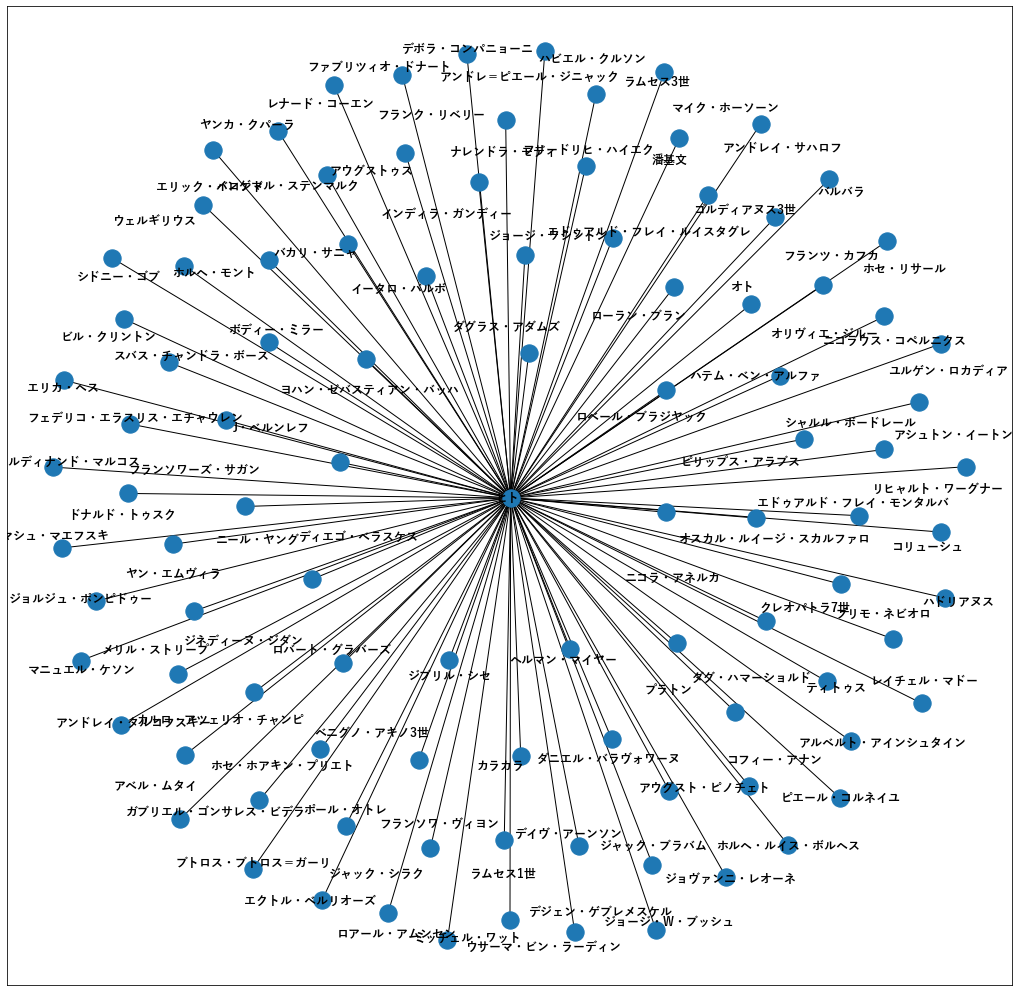

In [43]:
plt.figure(figsize=(18,18))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="Yu Gothic", font_weight="bold")
nx.draw_networkx(G,with_labels=False)

C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12498 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\ba

C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12498 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12519 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\hsuen\anaconda3\envs\py37\lib\site-packages\matplotlib\backends\backend_agg.

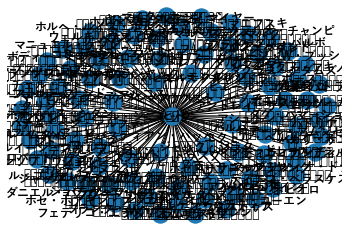

In [32]:
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="Yu Gothic", font_weight="bold")
nx.draw(G, with_labels = True) 

In [ ]:
result()

In [33]:
c.close()